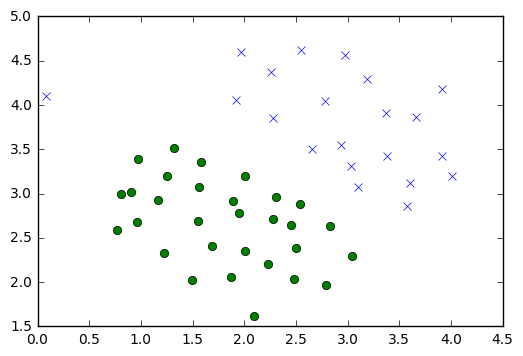

In [48]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf

mat = scipy.io.loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']
merged = np.concatenate([X, y], axis=1)

admitted = merged[merged[:, 2] == 1, :]
not_admitted = merged[merged[:, 2] == 0, :]

plt.plot(admitted[:, 0], admitted[:, 1], 'x')
plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

In [49]:
def input_fn():
    return {
        'x1': tf.constant(np.array(X)[:, 0]),
        'x2': tf.constant(np.array(X)[:, 1]),
        'example_id': tf.constant(map(str, range(len(X))))
    }, tf.constant(y)

    
x1 = tf.contrib.layers.real_valued_column('x1')
x2 = tf.contrib.layers.real_valued_column('x2')
svm_classifier = tf.contrib.learn.SVM(
    feature_columns=[x1,x2],
    example_id_column='example_id',
    l1_regularization=1,
    l2_regularization=1)

svm_classifier.fit(input_fn=input_fn, steps=1460)
accuracy = svm_classifier.evaluate(input_fn=input_fn, steps=1)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


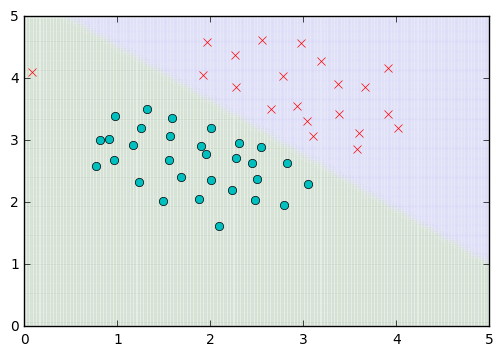

In [50]:
def visualize():
    syn_x1, syn_x2 = np.mgrid[0:5:140j, 0:5:140j]
    syn_x = np.vstack([syn_x1.ravel(), syn_x2.ravel()])
    syn_x1 = syn_x.T[:, 0]
    syn_x2 = syn_x.T[:, 1]
    def vis_input():
        return {
            'x1': tf.constant(syn_x.T[:, 0]),
            'x2': tf.constant(syn_x.T[:, 1]),
            'example_id': tf.constant(map(str, range(len(X))))
        }, []
    res = np.concatenate([syn_x.T, np.array(svm_classifier.predict(input_fn=vis_input)).reshape((len(syn_x.T), 1))], axis=1)
    res_accepted = res[res[:, 2] == 1, :]
    res_rejected = res[res[:, 2] == 0, :]
    plt.plot(res_accepted[:, 0], res_accepted[:, 1], 'o', alpha=0.01)
    plt.plot(res_rejected[:, 0], res_rejected[:, 1], 's', alpha=0.01)
    plt.plot(admitted[:, 0], admitted[:, 1], 'x')
    plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

visualize()


# Second Dataset

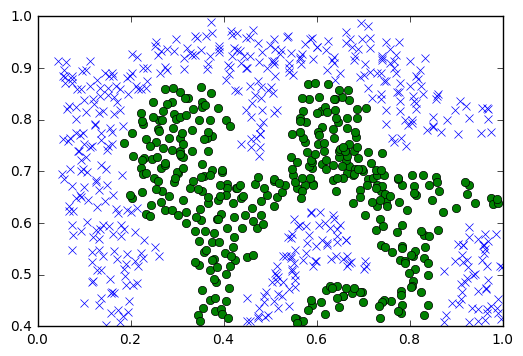

In [51]:
mat = scipy.io.loadmat('ex6data2.mat')
X = mat['X']
y = mat['y']
merged = np.concatenate([X, y], axis=1)

admitted = merged[merged[:, 2] == 1, :]
not_admitted = merged[merged[:, 2] == 0, :]

plt.plot(admitted[:, 0], admitted[:, 1], 'x')
plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

In [52]:
def input_fn():
    return {
        'x1': tf.constant(np.array(X)[:, 0]),
        'x2': tf.constant(np.array(X)[:, 1]),
        'example_id': tf.constant(map(str, range(len(X))))
    }, tf.constant(y)

    
x1 = tf.contrib.layers.real_valued_column('x1')
x2 = tf.contrib.layers.real_valued_column('x2')
svm_classifier = tf.contrib.learn.SVM(
    feature_columns=[x1,x2],
    example_id_column='example_id',
    l1_regularization=1,
    l2_regularization=1)

svm_classifier.fit(input_fn=input_fn, steps=3460)
accuracy = svm_classifier.evaluate(input_fn=input_fn, steps=1)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


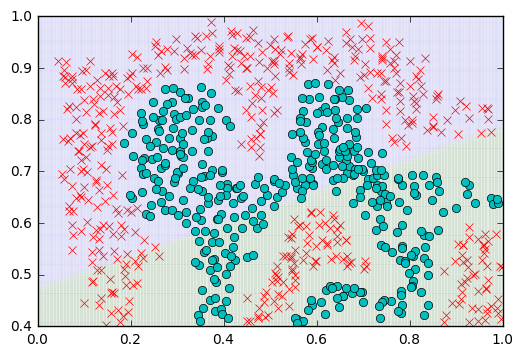

In [53]:
def visualize():
    syn_x1, syn_x2 = np.mgrid[0:1:140j, 0.4:1:140j]
    syn_x = np.vstack([syn_x1.ravel(), syn_x2.ravel()])
    syn_x1 = syn_x.T[:, 0]
    syn_x2 = syn_x.T[:, 1]
    def vis_input():
        return {
            'x1': tf.constant(syn_x.T[:, 0]),
            'x2': tf.constant(syn_x.T[:, 1]),
            'example_id': tf.constant(map(str, range(len(X))))
        }, []
    res = np.concatenate([syn_x.T, np.array(svm_classifier.predict(input_fn=vis_input)).reshape((len(syn_x.T), 1))], axis=1)
    res_accepted = res[res[:, 2] == 1, :]
    res_rejected = res[res[:, 2] == 0, :]
    plt.plot(res_accepted[:, 0], res_accepted[:, 1], 'o', alpha=0.01)
    plt.plot(res_rejected[:, 0], res_rejected[:, 1], 's', alpha=0.01)
    plt.plot(admitted[:, 0], admitted[:, 1], 'x')
    plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

visualize()


Neither TF nor Spark have great SVM support, so we'll be falling back to Scikit-Learn

In [54]:
!pip install sklearn
from sklearn.svm import SVC

In [55]:
clf = SVC(kernel='rbf', C=1, gamma=80)
clf.fit(X, y) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=80, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

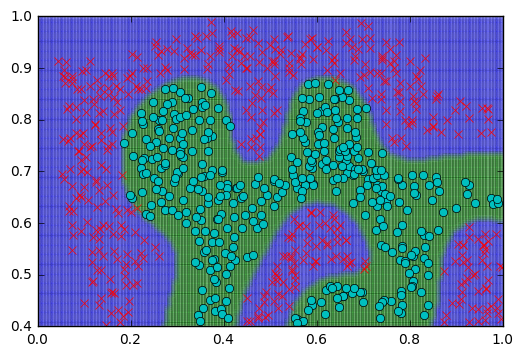

In [56]:
def visualize():
    syn_x1, syn_x2 = np.mgrid[0:1:140j, 0.4:1:140j]
    syn_x = np.vstack([syn_x1.ravel(), syn_x2.ravel()])
    syn_x1 = syn_x.T[:, 0]
    syn_x2 = syn_x.T[:, 1]
#     return clf.predict(syn_x.T)

    res = np.concatenate([syn_x.T, np.array(clf.predict(syn_x.T)).reshape((len(syn_x.T), 1))], axis=1)
    res_accepted = res[res[:, 2] == 1, :]
    res_rejected = res[res[:, 2] == 0, :]
    plt.plot(res_accepted[:, 0], res_accepted[:, 1], 'o', alpha=0.1)
    plt.plot(res_rejected[:, 0], res_rejected[:, 1], 's', alpha=0.1)
    plt.plot(admitted[:, 0], admitted[:, 1], 'x')
    plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

visualize()

# Dataset 3

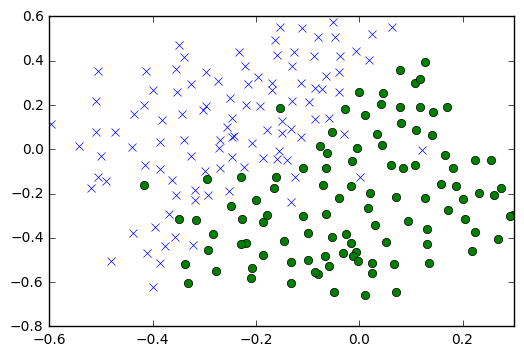

In [57]:
mat = scipy.io.loadmat('ex6data3.mat')
X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']
merged = np.concatenate([X, y], axis=1)

admitted = merged[merged[:, 2] == 1, :]
not_admitted = merged[merged[:, 2] == 0, :]

plt.plot(admitted[:, 0], admitted[:, 1], 'x')
plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

In [58]:
a = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
parameters = np.array(np.meshgrid(a, a)).T.reshape((-1, 2))

In [59]:
def evaluate(par):
    C = par[0]
    gamma = par[1]
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X, y)
    return [C, gamma, clf.score(Xval, yval)]
results =  np.apply_along_axis(evaluate, 1, parameters)

0.96499999999999997

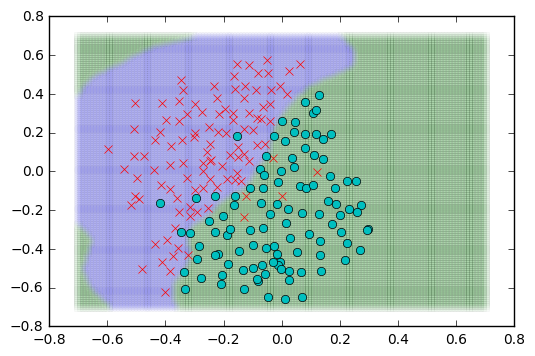

In [61]:
C, gamma, score = max(results, key=lambda x: x[2])
clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X, y) 
def visualize():
    syn_x1, syn_x2 = np.mgrid[-0.7:0.7:140j, -0.7:0.7:140j]
    syn_x = np.vstack([syn_x1.ravel(), syn_x2.ravel()])
    syn_x1 = syn_x.T[:, 0]
    syn_x2 = syn_x.T[:, 1]

    res = np.concatenate([syn_x.T, np.array(clf.predict(syn_x.T)).reshape((len(syn_x.T), 1))], axis=1)
    res_accepted = res[res[:, 2] == 1, :]
    res_rejected = res[res[:, 2] == 0, :]
    plt.plot(res_accepted[:, 0], res_accepted[:, 1], 'o', alpha=0.03)
    plt.plot(res_rejected[:, 0], res_rejected[:, 1], 's', alpha=0.03)
    plt.plot(admitted[:, 0], admitted[:, 1], 'x')
    plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

visualize()
# Validation Accuracy
score

Using Model selection

In [81]:
from sklearn.model_selection import GridSearchCV
d = {"C":[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300],
        "gamma":[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]}
clf = GridSearchCV(SVC(C=1), d,cv=2, scoring=lambda a,b,c: a.score(Xval, np.array(yval).flatten()))
clf.fit(X, np.array(y).flatten())


GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function <lambda> at 0x7f40c3061b90>, verbose=0)

In [82]:
print(clf.best_params_)

{'C': 10, 'gamma': 10}


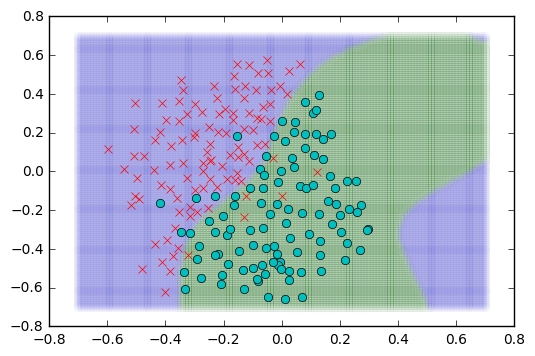

In [77]:
clf = SVC(kernel='rbf', C=30, gamma=3)
clf.fit(X, y) 
def visualize():
    syn_x1, syn_x2 = np.mgrid[-0.7:0.7:140j, -0.7:0.7:140j]
    syn_x = np.vstack([syn_x1.ravel(), syn_x2.ravel()])
    syn_x1 = syn_x.T[:, 0]
    syn_x2 = syn_x.T[:, 1]

    res = np.concatenate([syn_x.T, np.array(clf.predict(syn_x.T)).reshape((len(syn_x.T), 1))], axis=1)
    res_accepted = res[res[:, 2] == 1, :]
    res_rejected = res[res[:, 2] == 0, :]
    plt.plot(res_accepted[:, 0], res_accepted[:, 1], 'o', alpha=0.03)
    plt.plot(res_rejected[:, 0], res_rejected[:, 1], 's', alpha=0.03)
    plt.plot(admitted[:, 0], admitted[:, 1], 'x')
    plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

visualize()
# Validation Accuracy


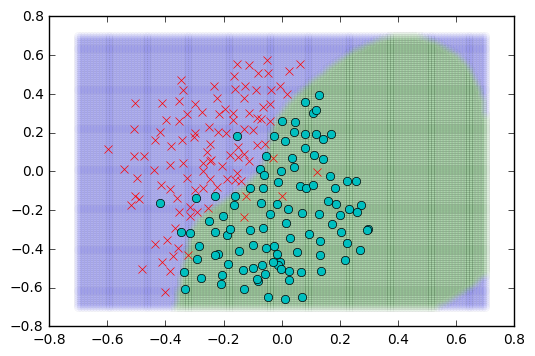

In [83]:
clf = SVC(kernel='rbf', C=10, gamma=10)
clf.fit(X, y) 
def visualize():
    syn_x1, syn_x2 = np.mgrid[-0.7:0.7:140j, -0.7:0.7:140j]
    syn_x = np.vstack([syn_x1.ravel(), syn_x2.ravel()])
    syn_x1 = syn_x.T[:, 0]
    syn_x2 = syn_x.T[:, 1]

    res = np.concatenate([syn_x.T, np.array(clf.predict(syn_x.T)).reshape((len(syn_x.T), 1))], axis=1)
    res_accepted = res[res[:, 2] == 1, :]
    res_rejected = res[res[:, 2] == 0, :]
    plt.plot(res_accepted[:, 0], res_accepted[:, 1], 'o', alpha=0.03)
    plt.plot(res_rejected[:, 0], res_rejected[:, 1], 's', alpha=0.03)
    plt.plot(admitted[:, 0], admitted[:, 1], 'x')
    plt.plot(not_admitted[:, 0], not_admitted[:, 1], 'o')

visualize()
# Validation Accuracy
